# Requirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loading the Dataset
Dataset used: https://www.kaggle.com/datasets/shibumohapatra/house-price

In [3]:
df = pd.read_csv('housing.csv', sep = ',')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [4]:
df.shape

(20640, 10)

In [5]:
df.isna().any().any()

np.True_

In [6]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


replacing any missing values in the total_bedrooms column with the mean of the existing non-missing values in that column

In [7]:
imputer = SimpleImputer(strategy='mean')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [8]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [9]:
df['median_house_value'].mean()

np.float64(206855.81690891474)

# Visualizations

In [10]:
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [11]:
feature_names = list(X.columns.values)
feature_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [12]:
number_of_features = X.shape[1]
number_of_features

9

histograms for each attribute

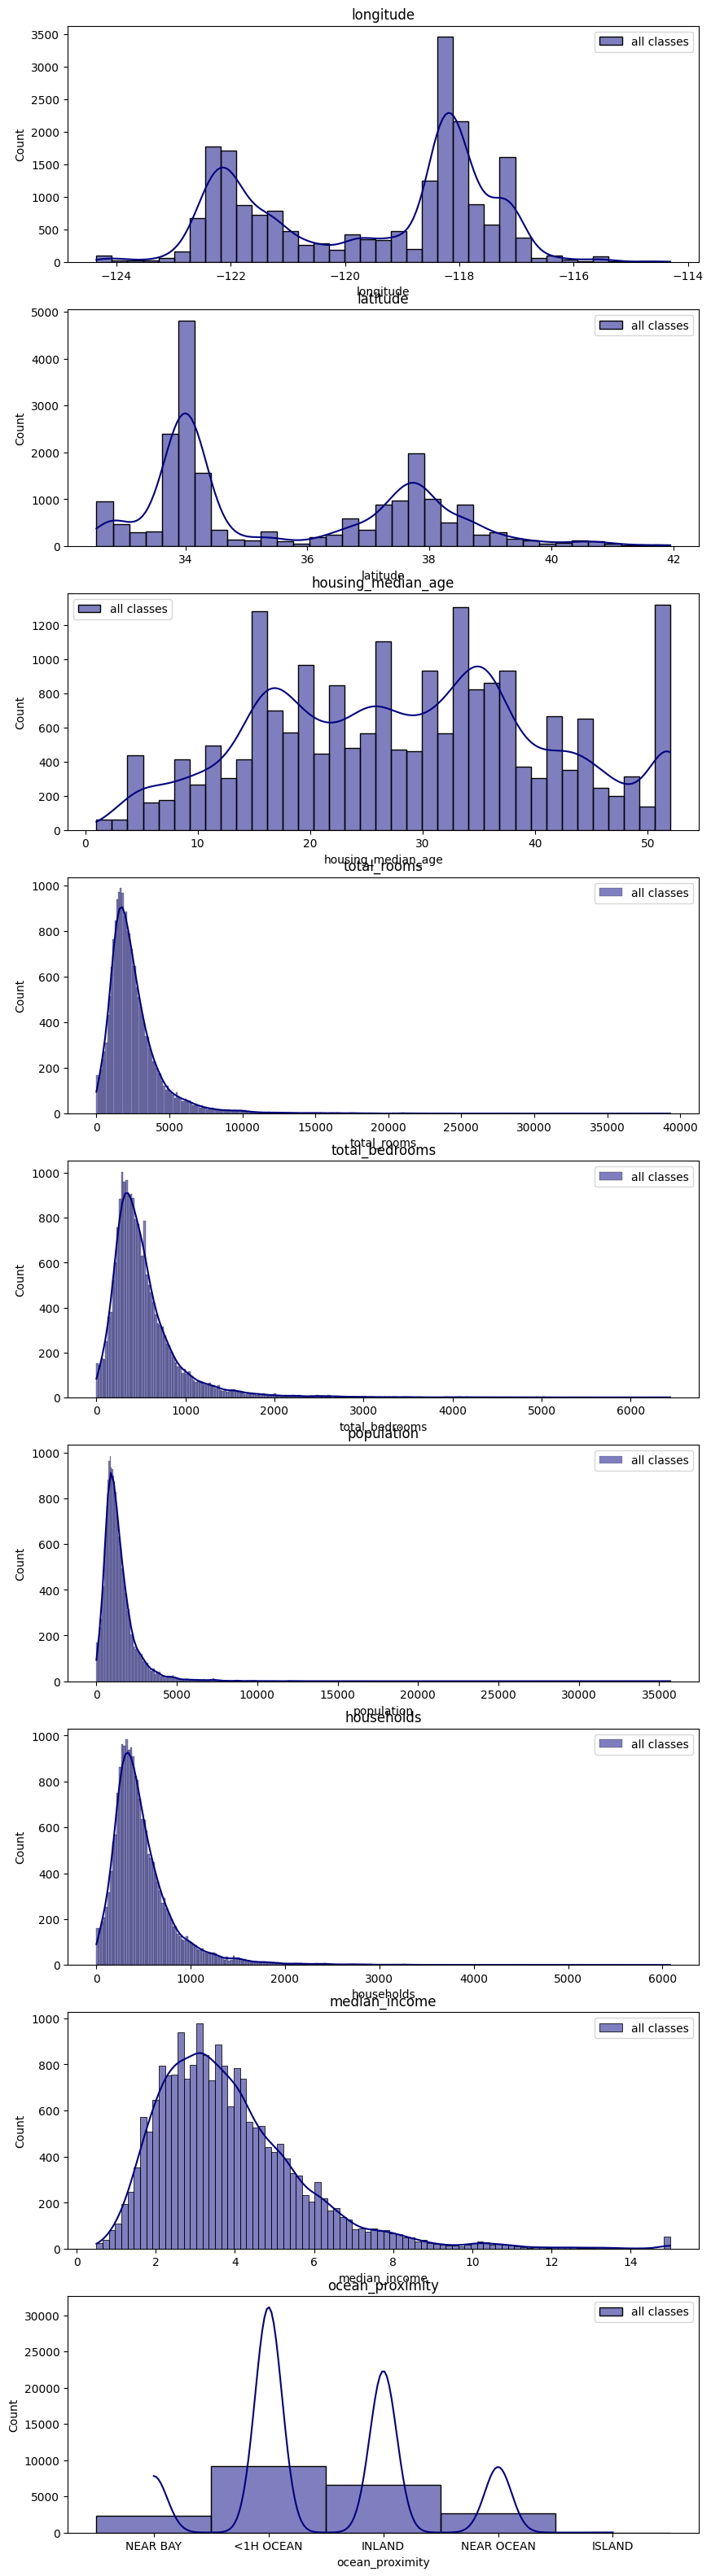

In [13]:
fig = plt.figure(figsize=(10, 40))
fig.tight_layout()
fig.subplots(nrows=9, ncols=1)
for i in range(number_of_features):
    ax = plt.subplot(9, 1, i+1)
    plt.title(feature_names[i])
    sns.histplot(X.iloc[:,i],color='navy',label='all classes',kde=True,stat="count")
    plt.legend()
plt.show()

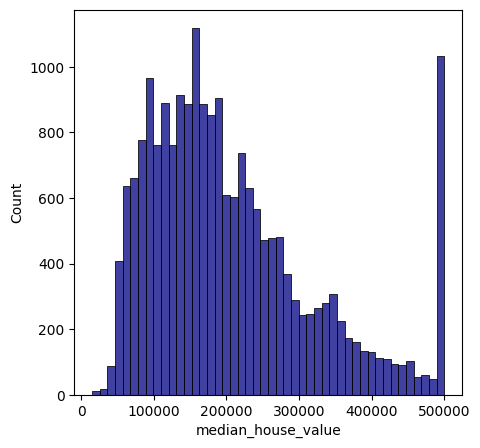

In [132]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(y, color = "navy")
plt.show()

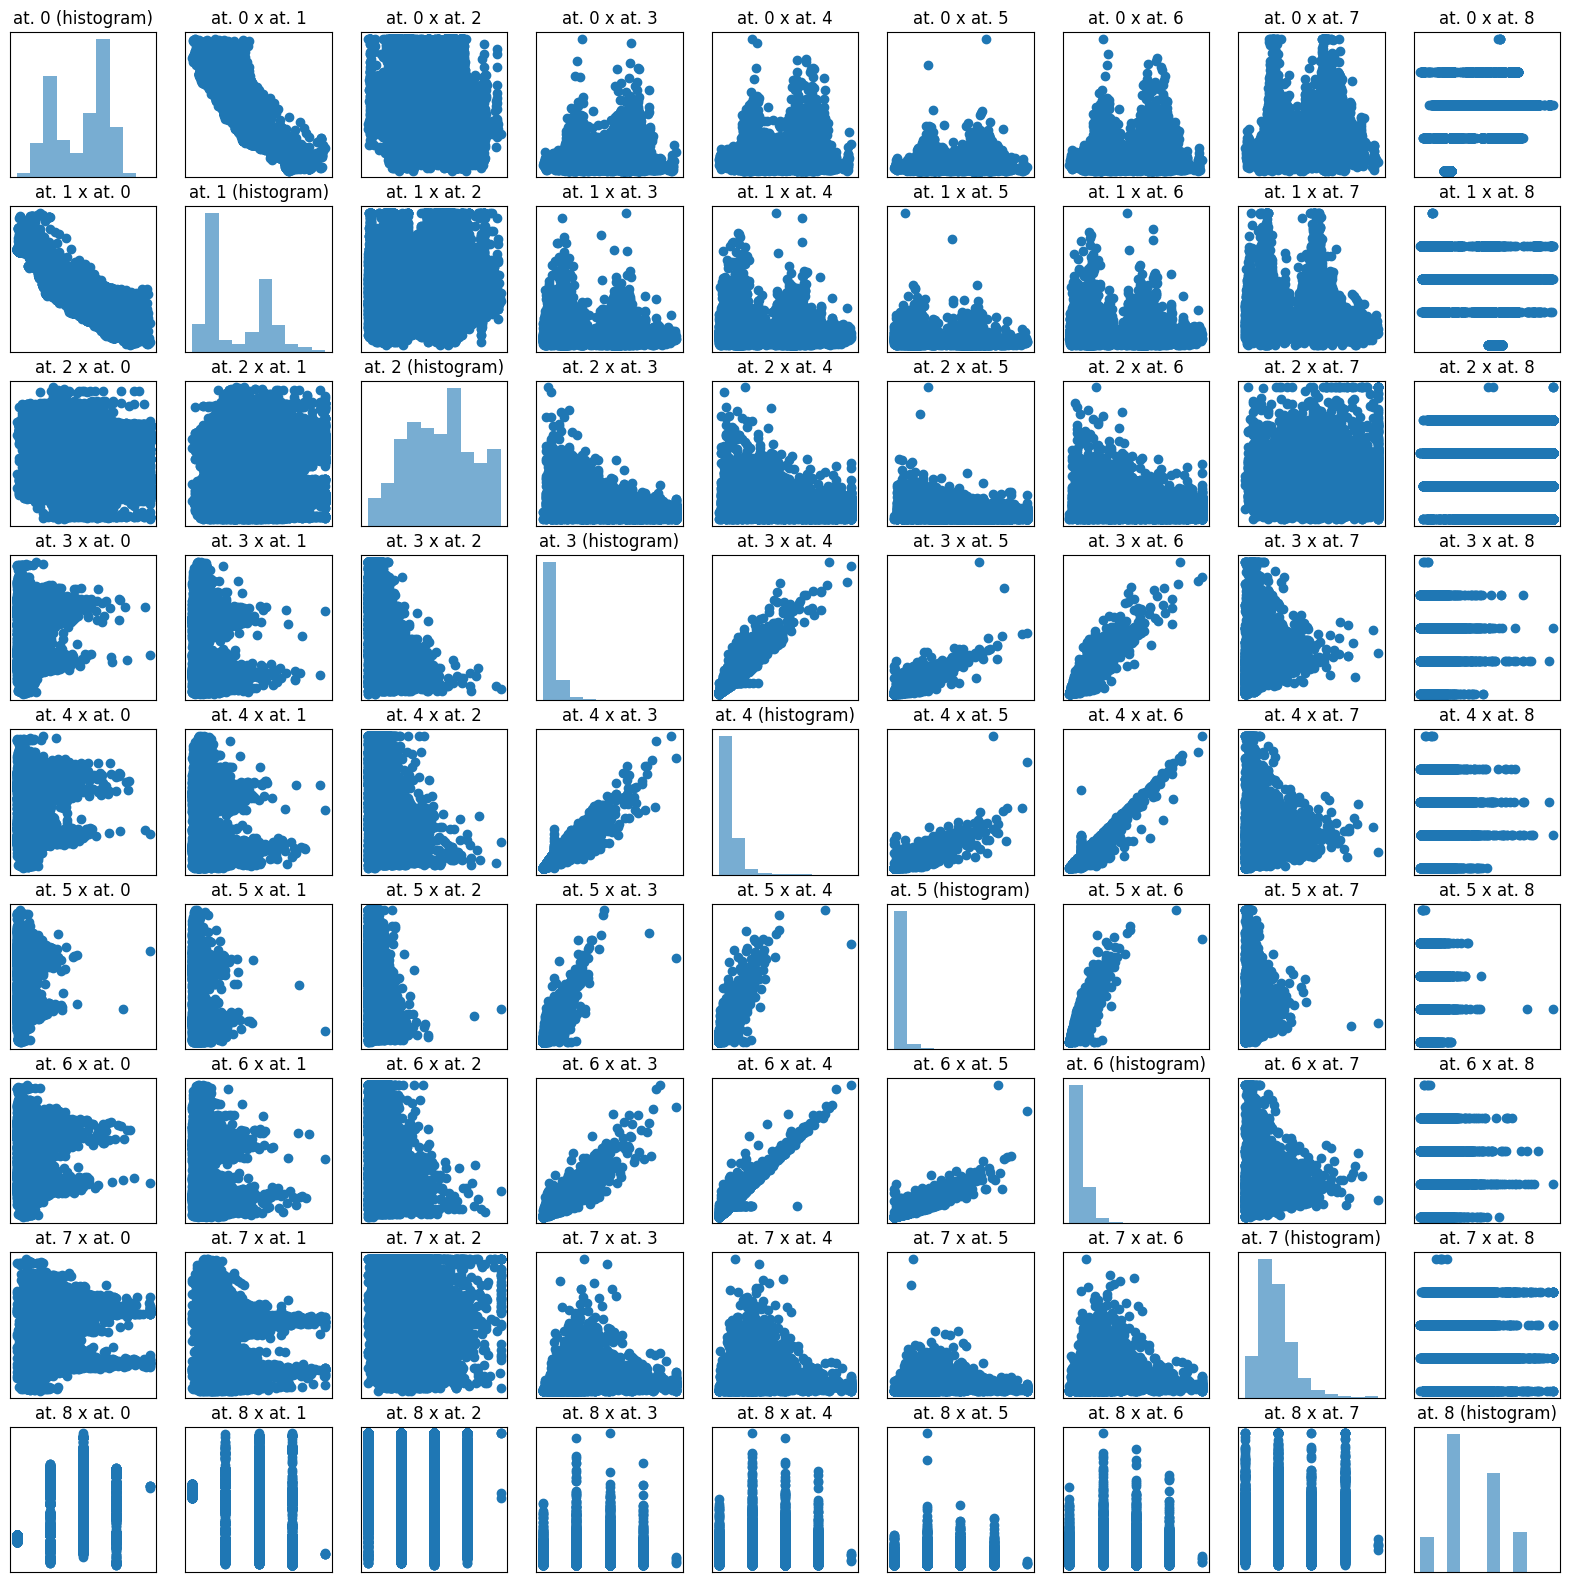

In [133]:
fig = plt.figure(figsize=(20, 20))
fig.tight_layout()
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        ax = plt.subplot(number_of_features, number_of_features, number_of_features*feature_i + feature_j+1)
        if feature_i==feature_j:
          plt.hist(X.iloc[:, feature_i], alpha=.6)
          plt.title("at. "+str(feature_i)+" (histogram)")
        else:
          plt.scatter(X.iloc[:,feature_i], X.iloc[:,feature_j])
          plt.title("at. "+str(feature_i)+" x at. "+str(feature_j)) # Атрибут i x Атрибут ј
          #plt.title(feature_names[feature_i] +" x "+feature_names[feature_j]) # Атрибут i x Атрибут ј
        plt.xticks(())
        plt.yticks(())
plt.show()

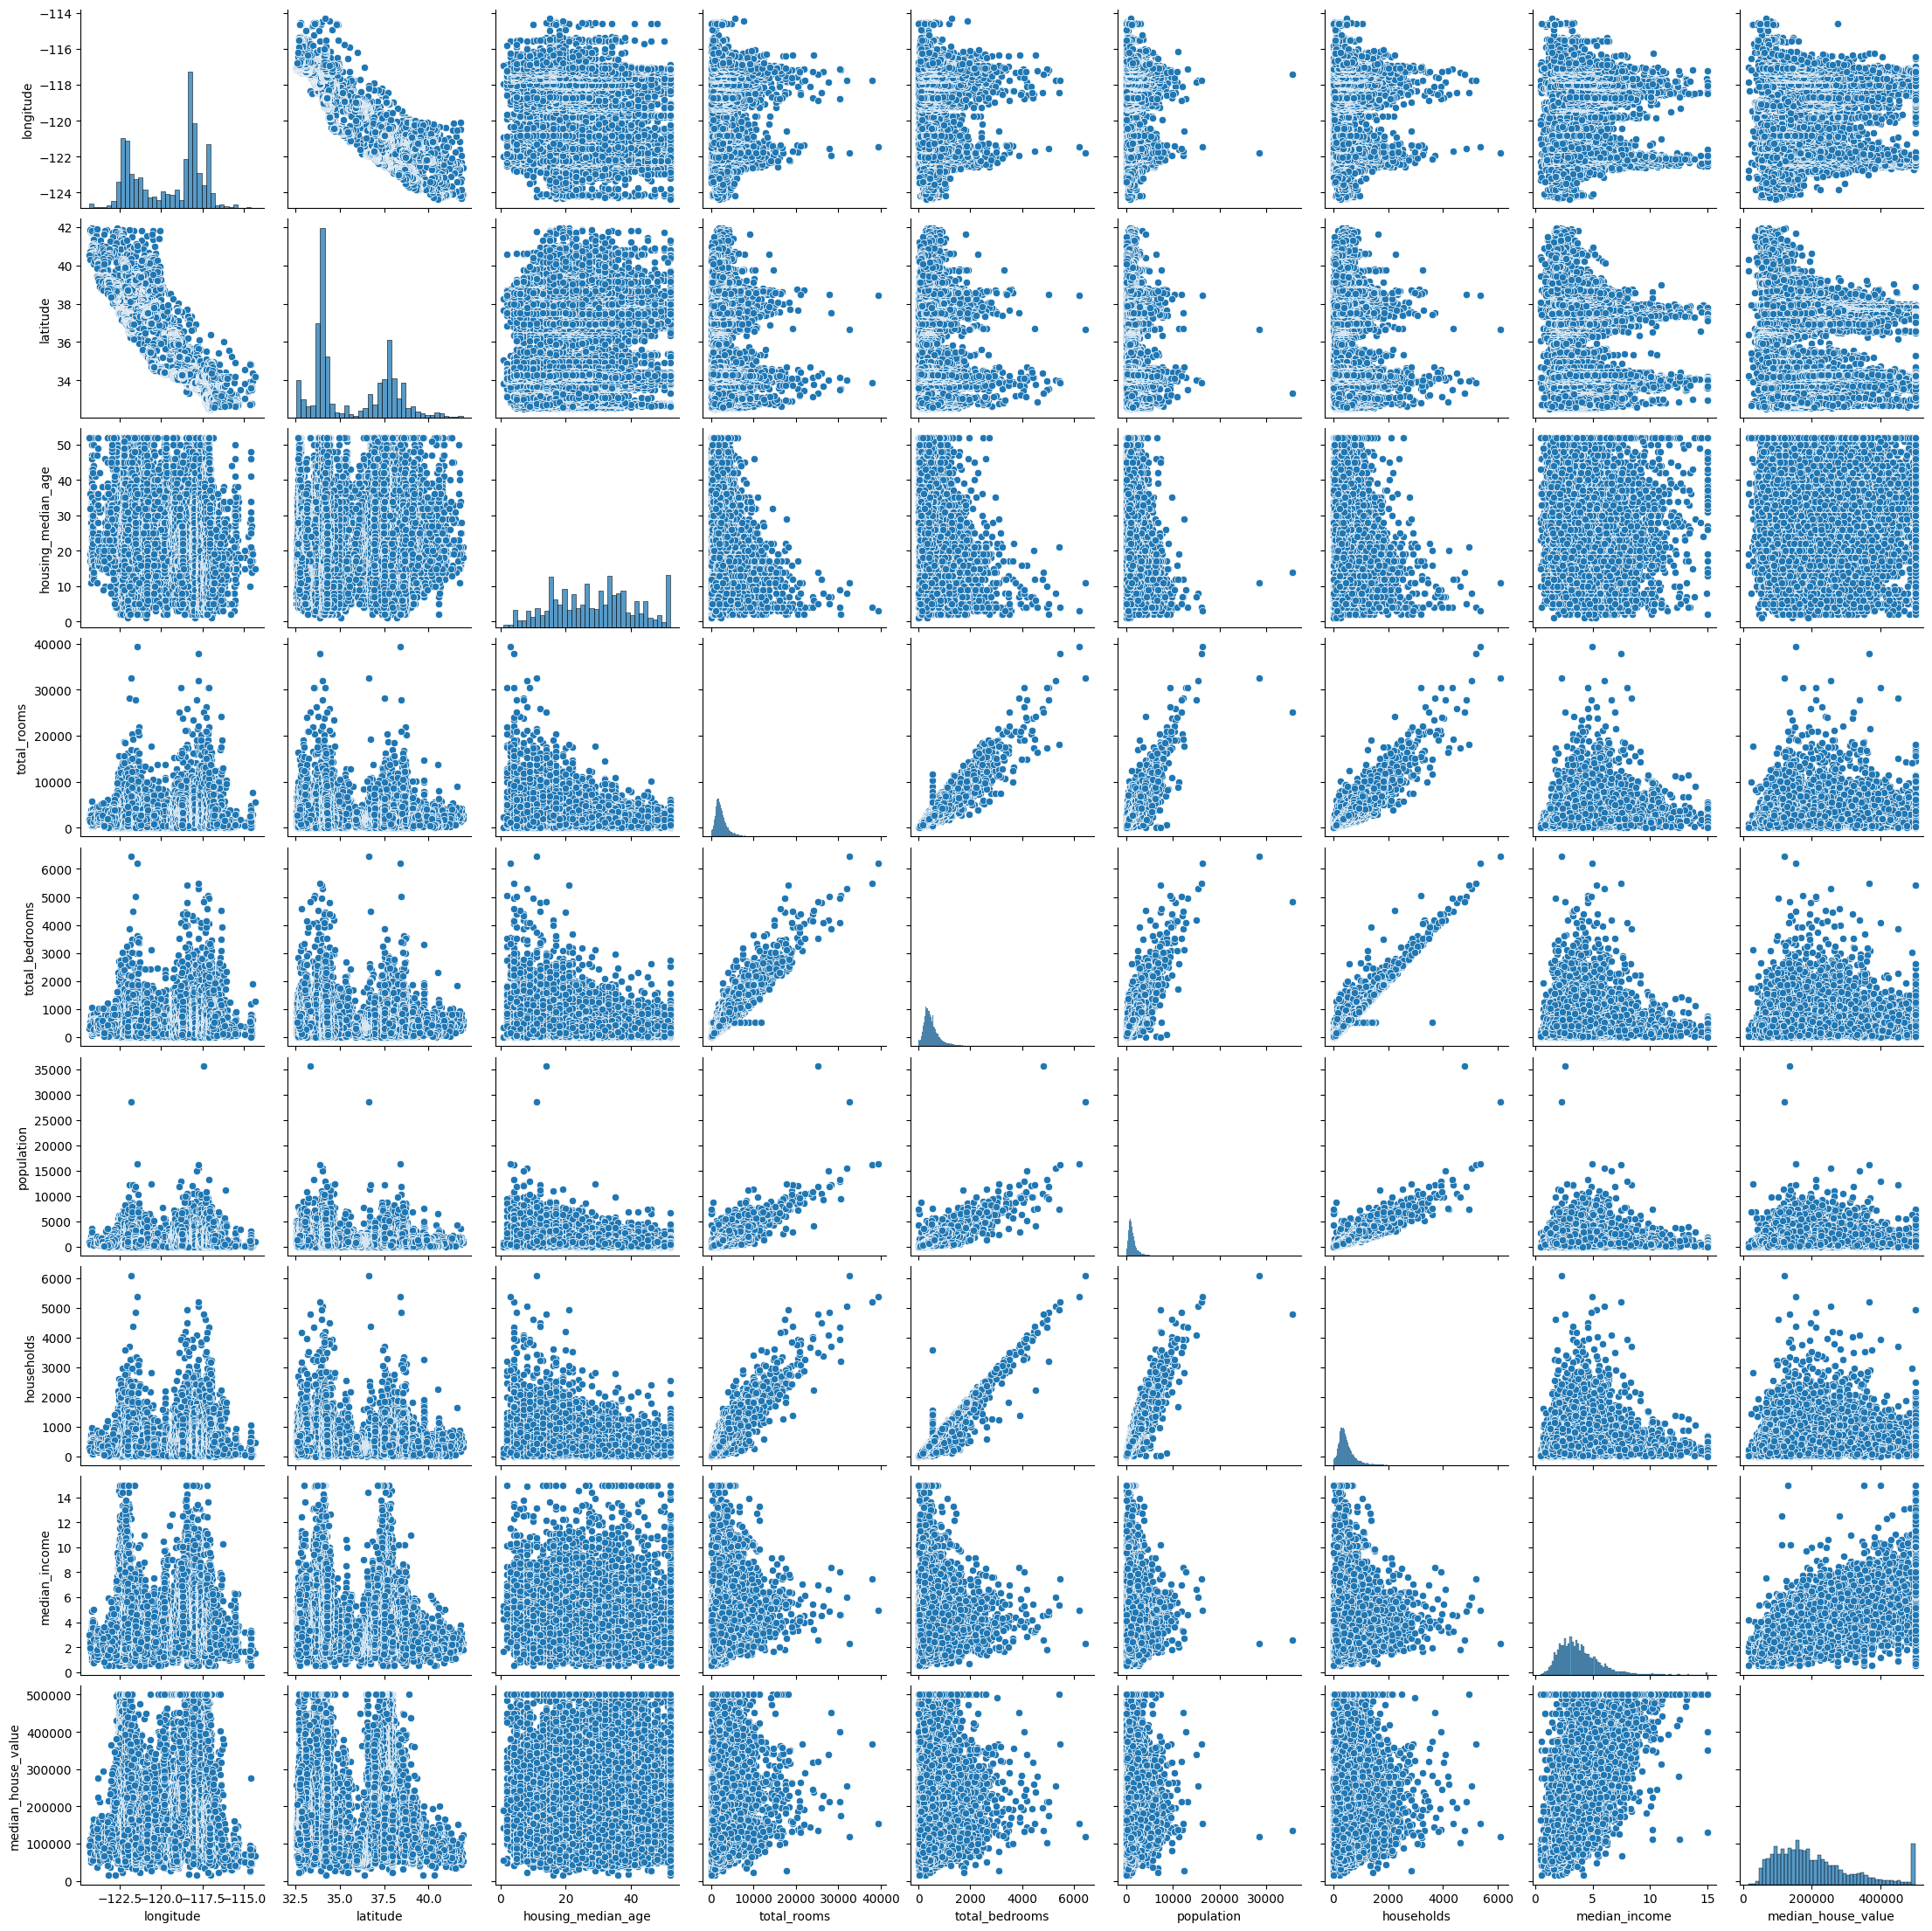

In [18]:
sns.pairplot(df)

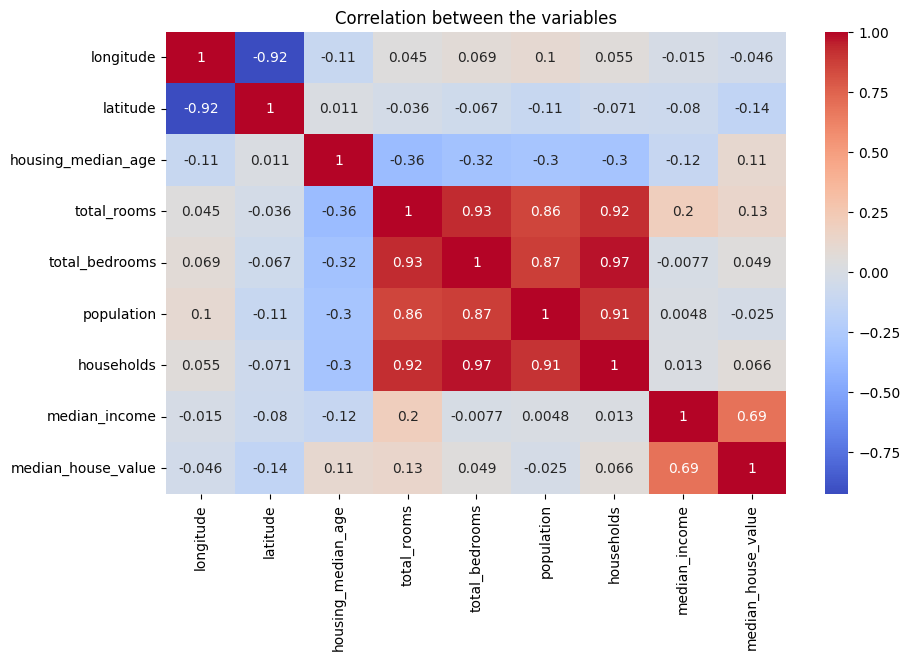

In [156]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation between the variables')
plt.show()

# Data Normalization

In [19]:
X = df.drop(["median_house_value"], axis=1)

In [20]:
columns_to_scale = X.drop(["ocean_proximity"], axis=1).columns.values.tolist()

scaler = MinMaxScaler()

X = scaler.fit_transform(X[columns_to_scale])
X = pd.DataFrame(X)

In [21]:
X[8] = df[["ocean_proximity"]]

In [22]:
labelencoder_X = LabelEncoder()

X[8] = labelencoder_X.fit_transform(X[8])

In [23]:
X

,0,1,2,3,4,5,6,7,8
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,3
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,3
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,3
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,3
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,3
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,1
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,1
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,1
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,1


Splitting the dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Regression

LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)

print("coefficients: ", lr.coef_)
print("intercept:", lr.intercept_)
print("mean squared error:", lr_mse)
print("rmse:", np.sqrt(lr_mse))
print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))

coefficients:  [-4.30690054e+05 -3.99689822e+05  6.05611450e+04 -3.13918150e+05
  7.71559701e+05 -1.34526424e+06  2.39999180e+05  5.84713638e+05
 -4.69805634e+02]
intercept: 365691.856316117
mean squared error: 4854757886.837104
rmse: 69676.09264903639
mean absolute error 51078.00678515681
r2 score:  0.6301249875767165


Ridge Regression

In [29]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred)

print("coefficients: ", ridge.coef_)
print("intercept:", ridge.intercept_)
print("mean squared error:", ridge_mse)
print("rmse:", np.sqrt(ridge_mse))
print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))

print("alpha:", ridge.alpha_)

coefficients:  [-4.29760290e+05 -3.98783723e+05  6.06657965e+04 -3.02780902e+05
  7.47537333e+05 -1.29742564e+06  2.33281418e+05  5.83606113e+05
 -4.03173927e+02]
intercept: 364977.360570004
mean squared error: 4851525387.5610285
rmse: 69652.89216939257
mean absolute error 51078.02514668345
r2 score:  0.6303712657099967
alpha: 0.1


Lasso Regression

In [30]:
lasso = LassoCV()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)

print("coefficients: ", lasso.coef_)
print("intercept:", lasso.intercept_)
print("mean squared error:", lasso_mse)
print("rmse:", np.sqrt(lasso_mse))
print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))

print("alpha:", lasso.alpha_)

coefficients:  [-4.30588617e+05 -3.99800302e+05  6.09526388e+04 -2.44944885e+05
  7.34783819e+05 -1.26778691e+06  1.83680326e+05  5.78413990e+05
 -3.73628770e+02]
intercept: 366800.5784223941
mean squared error: 4856690226.233997
rmse: 69689.9578578865
mean absolute error 51139.65598690816
r2 score:  0.6299777662167452
alpha: 12.380865169657193


Elastic Net

In [188]:
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.3)
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)

elastic_mse = mean_squared_error(y_test, y_pred)

print("coefficients: ", elastic.coef_)
print("intercept:", elastic.intercept_)
print("mean squared error:", elastic_mse)
print("rmse:", np.sqrt(elastic_mse))
print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))

coefficients:  [-18656.24370372 -38065.7931494   25084.50034758  10724.25526771
   6088.53096253   -991.14650076   7001.13873855 119928.09987911
   6164.13439445]
intercept: 177990.8021767246
mean squared error: 10356290469.40491
mean absolute error 80417.44215640781
r2 score:  0.21097340890754868


Bayesian Ridge Regression

In [31]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)

y_pred = bayesian.predict(X_test)

bayesian_mse = mean_squared_error(y_test, y_pred)

print("coefficients: ", bayesian.coef_)
print("intercept:", bayesian.intercept_)
print("mean squared error:", bayesian_mse)
print("rmse:", np.sqrt(bayesian_mse))
print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))

coefficients:  [-4.30564118e+05 -3.99566486e+05  6.05755494e+04 -3.12372338e+05
  7.68225129e+05 -1.33858232e+06  2.39047577e+05  5.84560304e+05
 -4.60551428e+02]
intercept: 365594.86202865536
mean squared error: 4854238066.449976
rmse: 69672.36228555751
mean absolute error 51077.719834379466
r2 score:  0.6301645917293084
